In [1]:
import os
import re
import shutil
import sys
from datetime import date

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from PIL import Image
from skimage import measure
from tifffile import imsave

# local imports
from image_arrays import *
from s2p_packer import unpack_hdf
import preprocess as pp

### Activate interactive plotting
By default, inline plots are static. Here we specify one of two options (comment out the undesired command) that will open plots with GUI controls for us.
- **qt ->** figures opened in windows outside the notebook
- **notebook ->** figures within notebook underneath generating cell.

In [2]:
# %matplotlib qt 
%matplotlib notebook

In [11]:
base_path = "/mnt/Data/prerna_velocity/example_movie/s2p/"
pth = base_path + "iGluSnFR_moving_spot_20210616_denoised.gif"
# movie = io.imread(pth)
movie = Image.open(pth)
stack = []
for i in range(movie.n_frames):
    movie.seek(i)
    stack.append(np.array(movie))
stack = np.stack(stack, axis=0)

<IPython.core.display.Javascript object>


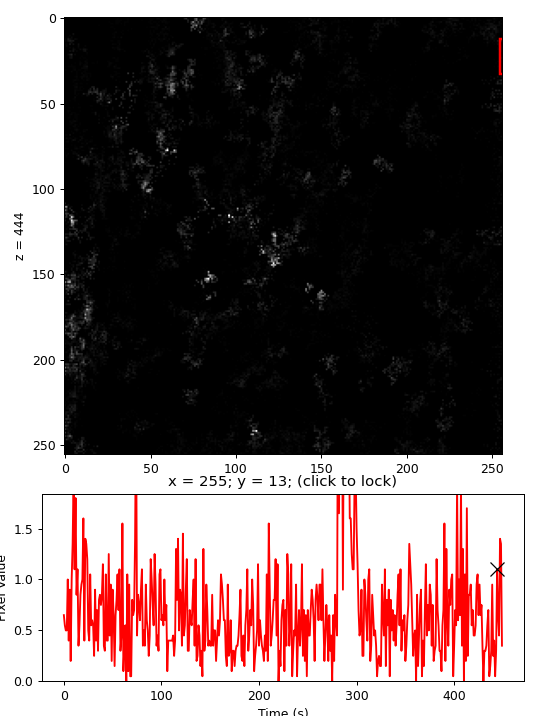

Movie shape: (450, 256, 256)


In [16]:
movie_plot = StackExplorer(
    stack,
#     zaxis=recs_xaxis,
    delta=1,
    roi_sz=20,
    vmin=0,
    figsize=(6, 8)
)
movie_plot.ax[1].set_xlabel("Time (s)")
movie_plot.ax[1].set_ylabel("Pixel Value")

print("Movie shape:", stack.shape)
movie_plot.fig.show()